In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [3]:
pd.options.mode.chained_assignment = None

In [27]:
event = ff1.get_event(2020, 2)
r = event.get_race()
ra = r.load(laps = True, telemetry = False, weather = False, livedata= False)
ra.get_race()

core           INFO 	Loading data for Styrian Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core           INFO 	Finished loading data for 1 drivers: ['55']


AttributeError: 'NoneType' object has no attribute 'get_race'

In [116]:
schedule = ff1.get_event_schedule(2019)
race = ff1.get_session(2021, 2, 'R')
race.load()
race = race.results
race.Abbreviation

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
/usr/local/lib/python3.9/site-packages/fastf1/core.py:1230: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
/usr/local/lib/python3.9/site-packages/fastf1/core.py:1230: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using

33    VER
44    HAM
4     NOR
16    LEC
55    SAI
3     RIC
10    GAS
18    STR
31    OCO
14    ALO
11    PER
22    TSU
7     RAI
99    GIO
5     VET
47    MSC
9     MAZ
77    BOT
63    RUS
6     LAT
Name: Abbreviation, dtype: object

In [118]:
race = race[race.Position == 1.0]
race

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,Red Bull Racing,0600EF,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 02:02:34.598000,Finished,25.0


In [119]:
winners = []

In [132]:
winner = race.Abbreviation.to_string
winner

'<bound method Series.to_string of 33    VER\nName: Abbreviation, dtype: object>'

In [125]:
str(winner)

'<bound method Series.to_string of 33    VER\nName: Abbreviation, dtype: object>'

In [109]:
winners.append(winner)

In [110]:
winners

[44    HAM
 Name: Abbreviation, dtype: object,
 33    VER
 Name: Abbreviation, dtype: object]

In [111]:
var = winner in winner

TypeError: unhashable type: 'DriverResult'

In [135]:
date = 1951
list_date= []
while date <= 2019:
    list_date.append(date)
    date += 1

In [6]:
tem_list = [2018, 2019]

In [30]:
winner_count = []
print(type(winner_count))
schedule = ff1.get_event_schedule(2021)
schedule
# winner_list = []
# for val in schedule['RoundNumber']:
#     # winners = []
#     # print(val)
#     race = ff1.get_session(2021, val, 'R')
#     race.load()
#     race = race.results
#     race = race[race.Position == 1.0]
#     winner = str(race['Abbreviation'])
#     # print("w: " + str(winner))
#     if winner not in winner_list:
#         winner_list.append(winner)
#     # df = race[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['Position'])
#     # print(df)
#     # list.append(df)
#     # print("winners: " + str(winner_list))
# print(winner_list)
# # winner_count.append(len(winner_list))
# print('winner_count: ' + str(winner_count))

<class 'list'>


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12,Practice 2,2021-03-13,Practice 3,2021-03-14,None,NaT,None,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26,Practice 2,2021-03-26,Practice 3,2021-03-27,Qualifying,2021-03-27,Race,2021-03-28,True
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITAL...,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16,Practice 2,2021-04-16,Practice 3,2021-04-17,Qualifying,2021-04-17,Race,2021-04-18,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30,Practice 2,2021-04-30,Practice 3,2021-05-01,Qualifying,2021-05-01,Race,2021-05-02,True
4,4,Spain,Montmeló,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07,Practice 2,2021-05-07,Practice 3,2021-05-08,Qualifying,2021-05-08,Race,2021-05-09,True
5,5,Monaco,Monte-Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20,Practice 2,2021-05-20,Practice 3,2021-05-22,Qualifying,2021-05-22,Race,2021-05-23,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04,Practice 2,2021-06-04,Practice 3,2021-06-05,Qualifying,2021-06-05,Race,2021-06-06,True
7,7,France,Le Castellet,FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021,2021-06-20,French Grand Prix,conventional,Practice 1,2021-06-18,Practice 2,2021-06-18,Practice 3,2021-06-19,Qualifying,2021-06-19,Race,2021-06-20,True
8,8,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS DER STEIERMARK 2021,2021-06-27,Styrian Grand Prix,conventional,Practice 1,2021-06-25,Practice 2,2021-06-25,Practice 3,2021-06-26,Qualifying,2021-06-26,Race,2021-06-27,True
9,9,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021,2021-07-04,Austrian Grand Prix,conventional,Practice 1,2021-07-02,Practice 2,2021-07-02,Practice 3,2021-07-03,Qualifying,2021-07-03,Race,2021-07-04,True


In [10]:
winner_list

['44    HAM\nName: Abbreviation, dtype: object',
 '33    VER\nName: Abbreviation, dtype: object',
 '11    PER\nName: Abbreviation, dtype: object',
 '31    OCO\nName: Abbreviation, dtype: object',
 '3    RIC\nName: Abbreviation, dtype: object',
 '77    BOT\nName: Abbreviation, dtype: object']

In [36]:
winner_count = []
print(type(winner_count))
for year in tem_list:
    schedule = ff1.get_event_schedule(year)
    schedule = schedule[schedule.RoundNumber !=0]
    winner_list = []
    for val in schedule['RoundNumber']:
        # winners = []
        # print(val)
        print("year: " + str(year) + " val: " + str(val))
        race = ff1.get_session(year, val, 'R')
        # race.load()
    #     race = race.results
    #     race = race[race.Position == 1.0]
    #     winner = str(race['Abbreviation'])
    #     # print("w: " + str(winner))
    #     if winner not in winner_list:
    #         winner_list.append(winner)
    #     # df = race[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['Position'])
    #     # print(df)
    #     # list.append(df)
    #     # print("winners: " + str(winner_list))
    # winner_count.append(len(winner_list))
    # print('winner_count: ' + str(winner_count))


<class 'list'>
year: 2018 val: 1
year: 2018 val: 2
year: 2018 val: 3
year: 2018 val: 4
year: 2018 val: 5
year: 2018 val: 6
year: 2018 val: 7
year: 2018 val: 8
year: 2018 val: 9
year: 2018 val: 10
year: 2018 val: 11
year: 2018 val: 12
year: 2018 val: 13
year: 2018 val: 14
year: 2018 val: 15
year: 2018 val: 16
year: 2018 val: 17
year: 2018 val: 18
year: 2018 val: 19
year: 2018 val: 20
year: 2018 val: 21
year: 2019 val: 1
year: 2019 val: 2
year: 2019 val: 3
year: 2019 val: 4
year: 2019 val: 5
year: 2019 val: 6
year: 2019 val: 7
year: 2019 val: 8
year: 2019 val: 9
year: 2019 val: 10
year: 2019 val: 11
year: 2019 val: 12
year: 2019 val: 13
year: 2019 val: 14
year: 2019 val: 15
year: 2019 val: 16
year: 2019 val: 17
year: 2019 val: 18
year: 2019 val: 19
year: 2019 val: 20
year: 2019 val: 21


In [ ]:
schedule = schedule[schedule.RoundNumber != 0]
winner_list = []
for val in schedule['RoundNumber']:
    # winners = []
    # print(val)
    race = ff1.get_session(2021, val, 'R')
    race.load()
    race = race.results
    race = race[race.Position == 1.0]
    winner = str(race['Abbreviation'])
    # print("w: " + str(winner))
    if winner not in winner_list:
        winner_list.append(winner)
    # df = race[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['Position'])
    # print(df)
    # list.append(df)
    # print("winners: " + str(winner_list))
len = len(winner_list)

In [134]:
len(winner_list)

6

In [62]:
race['Position'] == 1.0

44     True
33    False
77    False
11    False
4     False
16    False
31    False
14    False
3     False
10    False
55    False
99    False
5     False
18    False
22    False
63    False
47    False
6     False
9     False
7     False
Name: Position, dtype: bool

In [39]:
date = 1951
list_date= []
while date <= 2019:
    list_date.append(date)
    date += 1
list_date

[1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [40]:
race_count = []
for date in list_date:
    race_count.append(ff1.get_event_schedule(date)['RoundNumber'].count())

In [41]:
race_count.append(17)
race_count.append(22)
race_count.append(22)
list_date.append(2020)
list_date.append(2021)
list_date.append(2022)

In [42]:
race_count

[8,
 8,
 9,
 9,
 7,
 8,
 8,
 11,
 9,
 10,
 8,
 9,
 10,
 10,
 10,
 9,
 11,
 12,
 11,
 13,
 11,
 12,
 15,
 15,
 14,
 16,
 17,
 16,
 15,
 14,
 15,
 16,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 16,
 17,
 16,
 16,
 17,
 17,
 17,
 16,
 18,
 19,
 18,
 17,
 18,
 17,
 19,
 19,
 20,
 19,
 19,
 19,
 21,
 20,
 21,
 21,
 17,
 22,
 22]

In [43]:
list_date

[1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [44]:
raceyears = pd.DataFrame({'Year': list_date, 'NumRaces': race_count})

In [45]:
raceyears.head()

,Year,NumRaces
0,1951,8
1,1952,8
2,1953,9
3,1954,9
4,1955,7


Text(0, 0.5, 'Number of Races')

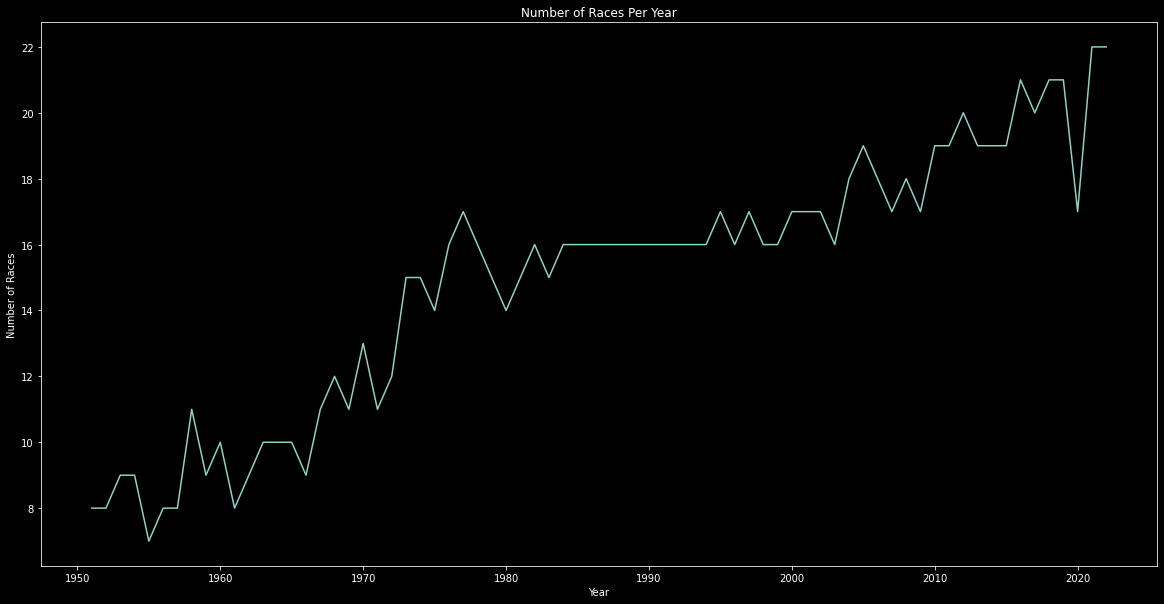

In [158]:
plt.figure(figsize=(20,10))
plt.plot(raceyears['Year'], raceyears['NumRaces'])
plt.title('Number of Races Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')

In [47]:
# schedule = ff1.get_event_schedule(2019)['RoundNumber'].count()
# schedule['RoundNumber']

ff1.get_event_schedule(2022)['RoundNumber']

# schedule2 = schedule['RoundNumber'].drop(0)
# list = []
# for val in schedule2:
#     # print(val)
#     race = ff1.get_session(2021, val, 'R')
#     race.load()
#     race = race.results
#     df = race[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['Position'])
#     print(df)
#     list.append(df)
# list

0      0
1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
15    14
16    15
17    16
18    17
19    18
20    19
21    20
22    21
23    22
Name: RoundNumber, dtype: int64